어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로
고민이 많다고 합니다. 현재까지진행된 결혼식에 대한 결혼식 참석 인원과 그중에서 
식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# quiz 데이터 파일로부터 데이터 불러와서 
# 결혼식 참석인원(total), 식수인원(reception)을 각각의 변수로 저장하시오

dataset = pd.read_csv('QuizData.csv')
dataset.head()

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [37]:
x = dataset.iloc[:,:-1].values  #2차원으로 만들기
y = dataset.iloc[:,-1].values   #1차원으로 만들기
y


array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
        68,  76, 149, 152, 183,  88, 101], dtype=int64)

In [10]:
#전체 데이터를 훈련세트와 테스트 세트로 분리하시오. 이때 비율은 75:25

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [11]:
# 훈련 세트를 이용하여 단순 선형회귀 모델을 생성하시오 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'wedding reception(train)')

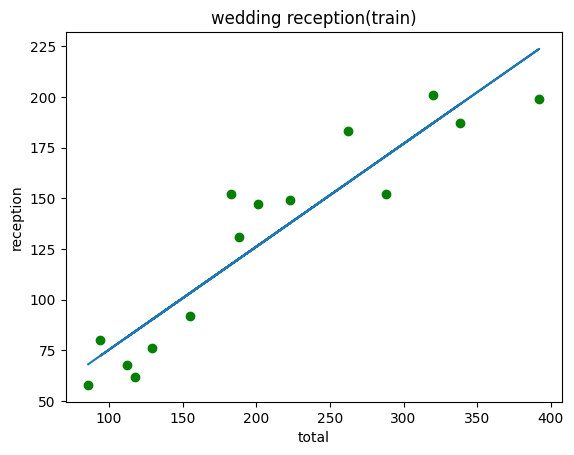

In [39]:
#훈련세트 데이터시각화하기 
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('total')
plt.ylabel('reception')
plt.title('wedding reception(train)')

In [54]:
#테스트 코드 데이터 시각화하기

y_pred = regressor.predict(x_train)
y_pred

# plt.plot(x_test,y_pred)

array([157.62040465, 126.62674204,  81.4064802 , 103.25447187,
       187.08978877, 120.02153525,  90.0440583 , 117.48107111,
       196.23545971, 170.83081822, 223.67247251,  72.26080926,
        84.45503717, 137.80478429,  68.19606662])

(50.0, 235.0)

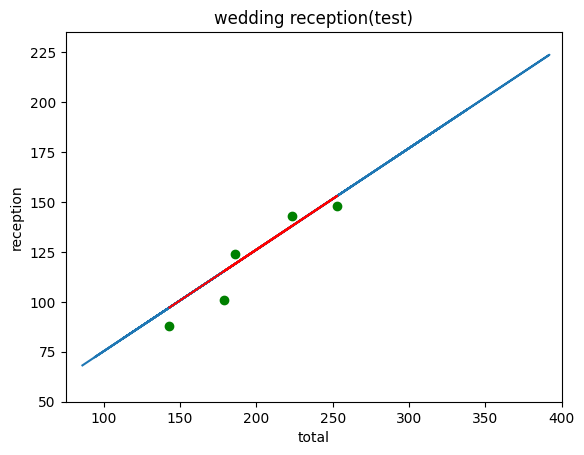

In [74]:
#테스트 코드 데이터 시각화하기
plt.scatter(x_test,y_test, color = 'green')
plt.plot(x_train,regressor.predict(x_train))
plt.plot(x_test,regressor.predict(x_test), color = 'red')
plt.xlabel('total')
plt.ylabel('reception')
plt.title('wedding reception(test)')
plt.xlim(75,400)
plt.ylim(50,235)

In [75]:
# 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오

# 훈련세트 평가점수 
regressor.score(x_train,y_train)
regressor.score(x_test,y_test)


0.8634953212566615

In [67]:
# regressor.score(x_test,y_test)
prediction = regressor.predict(x_test)
print(prediction)
print(y_test.values)
(y_test.values==prediction).mean()
regressor.score(x_test,y_test)


[ 97.15735792 153.04756918 115.44869979 119.00534959 137.80478429]
[ 88 148 101 124 143]


0.8634953212566615

In [76]:
#결혼식 참석인원이 300명일때 예상되는 식수 인원을 구하시오

regressor.predict([[300]])

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([176.92793218])